# Import Libraries

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Yahoo Finance API

In [2]:
# Create a Ticker object
ticker_symbol = "GOOGL"
ticker = yf.Ticker(ticker_symbol)

In [3]:
moving_average = 300
# Fetch historical market data
historical_data = ticker.history(period="30y").reset_index()  # data for the last year

historical_data[f'{moving_average}DMA'] = historical_data['Close'].rolling(window=moving_average).mean()

historical_data.loc[historical_data[f'{moving_average}DMA'] < historical_data['Close'], f'Greater_than_{moving_average}_DMA'] = historical_data['Close']
historical_data.loc[historical_data[f'{moving_average}DMA'] >= historical_data['Close'], f'Less_than_{moving_average}_DMA'] = historical_data['Close']

# pct extension from {300}DMA
historical_data['pct_extension'] = (historical_data['Close'] - historical_data[f'{300}DMA']) / historical_data[f'{300}DMA'] * 100
historical_data.loc[historical_data['pct_extension'] >= 0, 'Greater_than_0'] = historical_data['pct_extension']
historical_data.loc[historical_data['pct_extension'] < 0, 'Less_than_0'] = historical_data['pct_extension']
historical_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,300DMA,Greater_than_300_DMA,Less_than_300_DMA,pct_extension,Greater_than_0,Less_than_0
0,2004-08-19 00:00:00-04:00,2.487584,2.588579,2.387085,2.496041,893181924,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20 00:00:00-04:00,2.512708,2.713456,2.500021,2.694301,456686856,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23 00:00:00-04:00,2.754999,2.822910,2.712710,2.721417,365122512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24 00:00:00-04:00,2.767188,2.776143,2.576390,2.608728,304946748,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25 00:00:00-04:00,2.610968,2.686591,2.584102,2.636839,183772044,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,2025-06-23 00:00:00-04:00,166.270004,167.339996,162.000000,165.190002,57671000,0.0,0.0,171.044293,NaN,165.190002,-3.422675,NaN,-3.422675
5244,2025-06-24 00:00:00-04:00,166.919998,168.220001,166.130005,166.770004,40524300,0.0,0.0,171.071994,NaN,166.770004,-2.514725,NaN,-2.514725
5245,2025-06-25 00:00:00-04:00,167.630005,172.360001,167.550003,170.679993,35479000,0.0,0.0,171.118295,NaN,170.679993,-0.256140,NaN,-0.256140
5246,2025-06-26 00:00:00-04:00,172.429993,173.690002,169.940002,173.539993,31796700,0.0,0.0,171.183639,173.539993,NaN,1.376506,1.376506,NaN


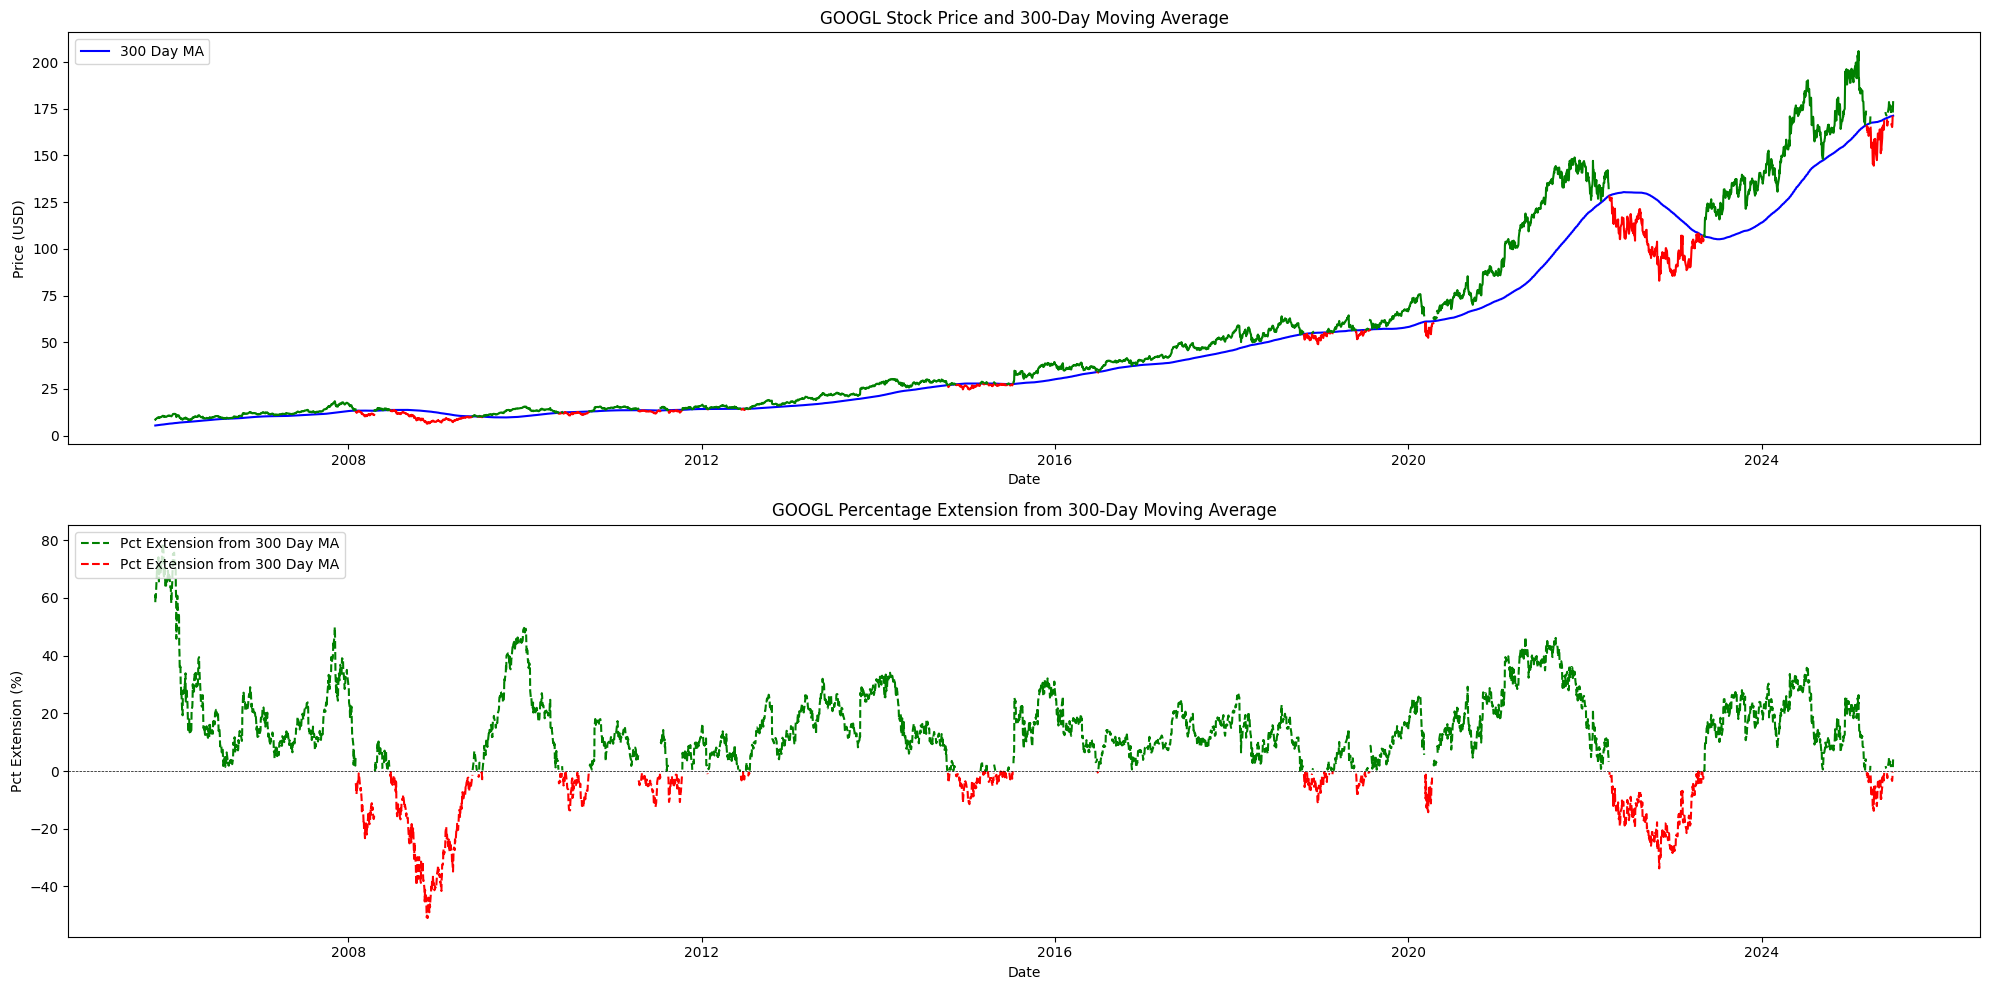

In [4]:
# plot Close & {moving_average}}DMA
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

ax[0].plot(historical_data['Date'], historical_data[f'{moving_average}DMA'], label=f'{moving_average} Day MA', color='Blue')
ax[0].plot(historical_data['Date'], historical_data[f'Less_than_{moving_average}_DMA'], color='Red')
ax[0].plot(historical_data['Date'], historical_data[f'Greater_than_{moving_average}_DMA'], color='Green')

ax[0].set_title(f"{ticker_symbol} Stock Price and {moving_average}-Day Moving Average")
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price (USD)')
ax[0].legend(loc='upper left')

ax[1].plot(historical_data['Date'], historical_data['Greater_than_0'], label=f'Pct Extension from {moving_average} Day MA', color='Green', linestyle='--')
ax[1].plot(historical_data['Date'], historical_data['Less_than_0'], label=f'Pct Extension from {moving_average} Day MA', color='Red', linestyle='--')
ax[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
ax[1].set_title(f"{ticker_symbol} Percentage Extension from {moving_average}-Day Moving Average")
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Pct Extension (%)')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [5]:
# Create subplots with 2 rows, 1 column
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(f'{moving_average} Day Moving Average Analysis', 'Percentage Extension Analysis'),
    vertical_spacing=0.1,
    shared_xaxes=True
)

# First subplot: Moving Average and comparison lines
fig.add_trace(
    go.Scatter(
        x=historical_data['Date'], 
        y=historical_data[f'{moving_average}DMA'],
        mode='lines', 
        name=f'{moving_average} Day MA', 
        line=dict(color='blue')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=historical_data['Date'], 
        y=historical_data[f'Less_than_{moving_average}_DMA'],
        mode='lines', 
        name=f'Less than {moving_average} DMA', 
        line=dict(color='red')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=historical_data['Date'], 
        y=historical_data[f'Greater_than_{moving_average}_DMA'],
        mode='lines', 
        name=f'Greater than {moving_average} DMA', 
        line=dict(color='green')
    ),
    row=1, col=1
)

# Second subplot: Percentage extension lines
fig.add_trace(
    go.Scatter(
        x=historical_data['Date'], 
        y=historical_data['Greater_than_0'],
        mode='lines', 
        name='Pct Extension Greater than 0', 
        line=dict(color='green', dash='dash')
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=historical_data['Date'], 
        y=historical_data['Less_than_0'],
        mode='lines', 
        name='Pct Extension Less than 0', 
        line=dict(color='red', dash='dash')
    ),
    row=2, col=1
)

# Update layout for better appearance
fig.update_layout(
    height=800,  # Increase height for 2 subplots
    title_text=f"Moving Average Analysis Dashboard",
    title_x=0.5,
    showlegend=True,
    hovermode='x unified'
)

# Update x-axis labels
fig.update_xaxes(title_text="Date", row=2, col=1)

# Update y-axis labels
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Percentage Extension", row=2, col=1)

# Show the plot
fig.show()